(23240, 14470)
Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      3187
           1       0.82      0.98      0.89      3785

    accuracy                           0.87      6972
   macro avg       0.89      0.86      0.87      6972
weighted avg       0.89      0.87      0.87      6972



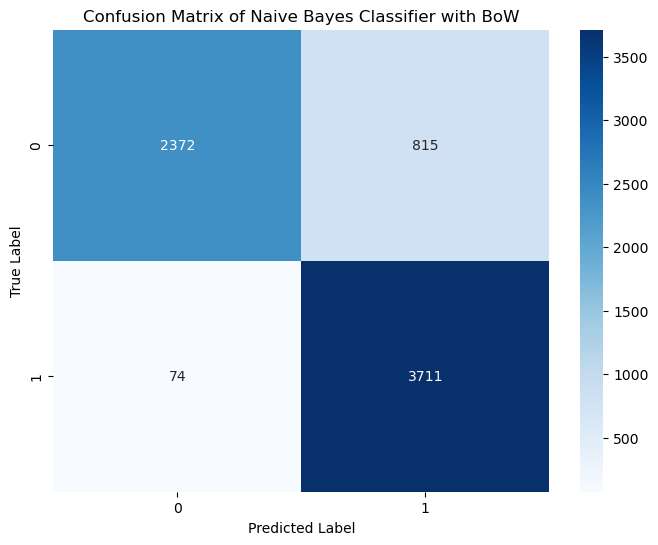

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the dataset
corpus = pd.read_csv('data/cleaned_mhc.csv')

# Assuming 'text' is the column with the documents and 'label' is the target column
# Replace these with the actual column names in your dataset if they differ
X = corpus['text']  # Text column
y = corpus['label']  # Label column

# Vectorize the corpus using Bag of Words (BoW)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(X)

print(bow_matrix.shape)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Naive Bayes Classifier with BoW")
plt.show()

(23240, 14470)
Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.55      0.66      3187
           1       0.70      0.89      0.78      3785

    accuracy                           0.74      6972
   macro avg       0.76      0.72      0.72      6972
weighted avg       0.75      0.74      0.73      6972



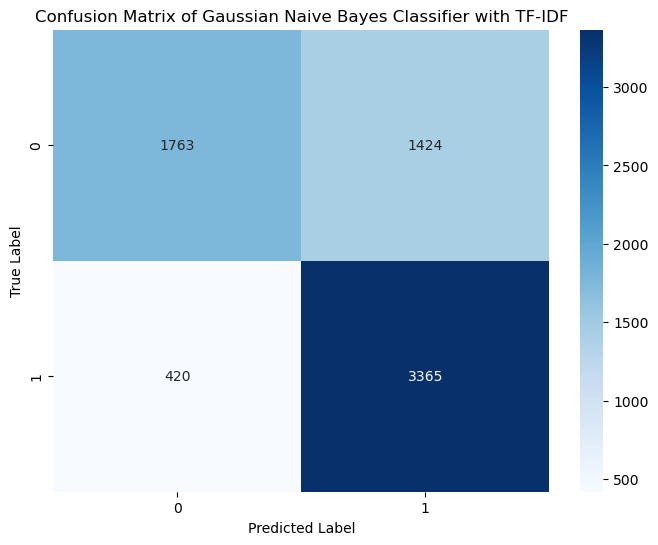

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the dataset
corpus = pd.read_csv('data/cleaned_mhc.csv')

# Assuming 'text' is the column with the documents and 'label' is the target column
# Replace these with the actual column names in your dataset if they differ
X = corpus['text']  # Text column
y = corpus['label']  # Label column

# Vectorize the corpus using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X)

# Convert sparse matrix to dense for GaussianNB
X_dense = tfidf_matrix.toarray()

# Check the shape of the matrix
print(X_dense.shape)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Gaussian Naive Bayes Classifier with TF-IDF")
plt.show()
